In [4]:
# EDA_LW

In [7]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

In [10]:
pwd

'/Users/lilywenger/MLM25/GitProjects/DigitRecognizer_Inkvestigators_mlm25/digit-recognizer'

In [15]:
# load training dataset
df_train = pd.read_csv('./train.csv')
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
import math

In [21]:
# Count total missing values
print("Missing values per column:\n", df_train.isna().sum().head())  
print("Total missing values:", df_train.isna().sum().sum())

Missing values per column:
 label     0
pixel0    0
pixel1    0
pixel2    0
pixel3    0
dtype: int64
Total missing values: 0


In [23]:
print("Missing values per column:\n", df_train.isna().sum().head())

Missing values per column:
 label     0
pixel0    0
pixel1    0
pixel2    0
pixel3    0
dtype: int64


In [25]:
print("Total missing values:", df_train.isna().sum().sum())

Total missing values: 0


In [27]:
print("Missing values per column:\n", df_train.isna().sum())

Missing values per column:
 label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


In [29]:
# Duplicates across the entire row (label + pixels)
dup_all = df_train[df_train.duplicated(keep=False)]
print("Total duplicate rows (including labels):", dup_all.shape[0])

Total duplicate rows (including labels): 0


In [31]:
# Duplicates in just the pixels (ignoring label)
dup_pixels = df_train[df_train.drop("label", axis=1).duplicated(keep=False)]
print("Total duplicate rows (ignoring labels):", dup_pixels.shape[0])

Total duplicate rows (ignoring labels): 0


In [33]:
pixels = df_train.drop("label", axis=1)

# Sum of pixel values per image
pixel_sums = pixels.sum(axis=1)

# Pick a threshold (adjust as needed)
threshold = 127  
blank_like = df_train[pixel_sums < threshold]

print("Nearly blank images:", blank_like.shape[0])

Nearly blank images: 0


In [35]:
# Drop labels, keep just pixels
pixels = df_train.drop("label", axis=1)

# Boolean mask: True if all pixel values in the row < 127
low_intensity_mask = (pixels < 127).all(axis=1)

# Get those rows
low_intensity_rows = df_train[low_intensity_mask]

print("Rows with all pixels < 127:", low_intensity_rows.shape[0])

Rows with all pixels < 127: 0


In [37]:
import numpy as np

# Drop labels, keep just pixels
pixels = df_train.drop("label", axis=1)

# Boolean mask per pixel: True if pixel < 127
below_threshold = (pixels < 127)

# Fraction of pixels below threshold for each row
fraction_below = below_threshold.mean(axis=1)

# Mask: rows where ≥90% of pixels are below 127
low_intensity_90 = fraction_below >= 0.9

# Get those rows
low_intensity_rows_90 = df_train[low_intensity_90]

print("Rows with ≥90% of pixels < 127:", low_intensity_rows_90.shape[0])

Rows with ≥90% of pixels < 127: 10310


In [39]:
# visualize a few of these

Label: 1


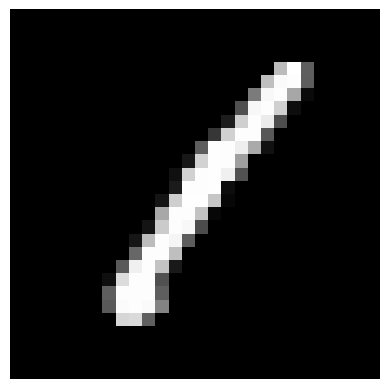

Label: 1


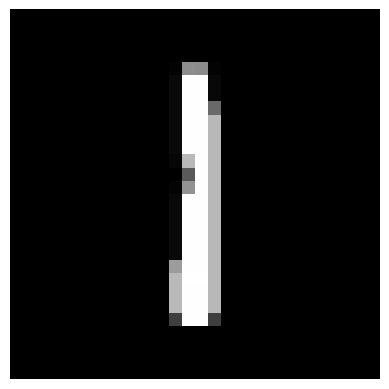

Label: 4


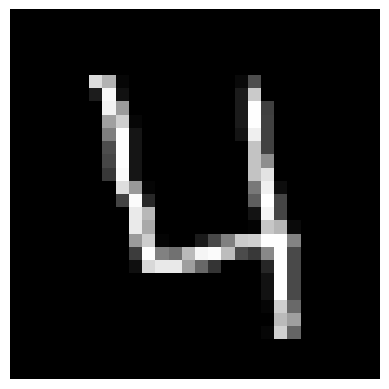

In [41]:
def show_image(row):
    img = row.values.reshape(28,28)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.show()

if not low_intensity_rows_90.empty:
    for i in range(3):  # show first 3 examples
        print("Label:", low_intensity_rows_90.iloc[i,0])
        show_image(low_intensity_rows_90.drop("label", axis=1).iloc[i])

In [43]:
# Count how many "dim" rows per label
label_counts_dim = low_intensity_rows_90['label'].value_counts().sort_index()

print("Label distribution of dim images (≥90% pixels <127):")
print(label_counts_dim)

Label distribution of dim images (≥90% pixels <127):
label
0     118
1    4039
2     368
3     545
4    1091
5     852
6     580
7    1466
8     287
9     964
Name: count, dtype: int64


In [45]:
# Drop labels, keep just pixels
pixels = df_train.drop("label", axis=1)

# Boolean mask per pixel: True if pixel < 127
below_threshold = (pixels < 127)

# Fraction of pixels below threshold for each row
fraction_below = below_threshold.mean(axis=1)

# Mask: rows where ≥90% of pixels are below 127
low_intensity_95 = fraction_below >= 0.95

# Get those rows
low_intensity_rows_95 = df_train[low_intensity_95]

print("Rows with ≥95% of pixels < 127:", low_intensity_rows_95.shape[0])

Rows with ≥95% of pixels < 127: 510


In [48]:
# Count how many "dim" rows per label
label_counts_dim = low_intensity_rows_95['label'].value_counts().sort_index()

print("Label distribution of dim images (≥95% pixels <127):")
print(label_counts_dim)

Label distribution of dim images (≥95% pixels <127):
label
1    464
2      3
3      7
4      5
5     14
6      3
7      8
8      1
9      5
Name: count, dtype: int64


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='mean_intensity', data=df_train)
plt.title("Distribution of Mean Pixel Intensity per Digit")
plt.show()

ValueError: Could not interpret value `mean_intensity` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

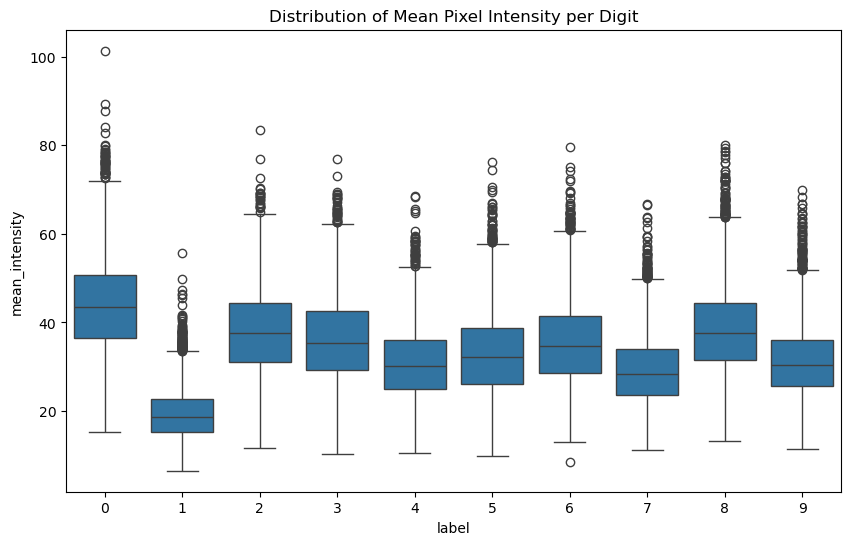

In [60]:
# Drop labels, keep just pixels
pixels = df_train.drop("label", axis=1)

# Compute mean intensity
df_train["mean_intensity"] = pixels.mean(axis=1)

# Now plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x="label", y="mean_intensity", data=df_train)
plt.title("Distribution of Mean Pixel Intensity per Digit")

#also to save the image from matplotlib
plt.savefig("Distribution of Mean Pixel Intensity per Digit", dpi=300, bbox_inches='tight')

plt.show()

In [54]:
# Group by label and compute the average mean_intensity
mean_by_label = df_train.groupby("label")["mean_intensity"].mean()

print("Average mean pixel intensity per digit:\n")
print(mean_by_label)

Average mean pixel intensity per digit:

label
0    44.173989
1    19.373044
2    38.100892
3    36.122689
4    30.909085
5    32.953980
6    35.376170
7    29.249036
8    38.500189
9    31.318559
Name: mean_intensity, dtype: float64


       label  pixel_area
0          1          64
1          0         176
2          1          58
3          4          59
4          0         202
...      ...         ...
41995      0         117
41996      1          53
41997      7         138
41998      6         104
41999      9          73

[42000 rows x 2 columns]


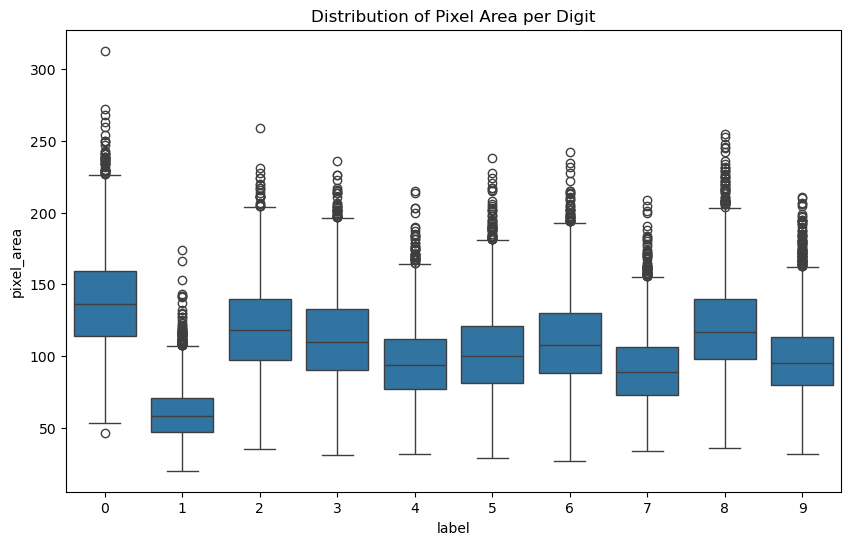

In [68]:
# area of the raw dataset

# Drop labels, keep just pixels
pixels = df_train.drop("label", axis=1)

# Define threshold for active pixels
threshold = 127

# Compute pixel area = number of pixels > threshold
df_train["pixel_area"] = (pixels > threshold).sum(axis=1)

# Quick check
print(df_train[["label", "pixel_area"]])

plt.figure(figsize=(10,6))
sns.boxplot(x="label", y="pixel_area", data=df_train)
plt.title("Distribution of Pixel Area per Digit")
plt.savefig("Distribution of Pixel Area per Digit", dpi=300, bbox_inches='tight')
plt.show()

In [74]:
# binary test set
# Make a copy of the original dataframe
binary_train = df_train.copy()

In [76]:
# List of pixel columns (everything except the label)
pixel_columns = [c for c in binary_train.columns if c != "label"]

In [78]:
# Apply threshold in place on binary_train
binary_train[pixel_columns] = (binary_train[pixel_columns] > 127).astype(int)

In [80]:
# Check the first few rows
print(binary_train.head()[pixel_columns[:5]])

   pixel0  pixel1  pixel2  pixel3  pixel4
0       0       0       0       0       0
1       0       0       0       0       0
2       0       0       0       0       0
3       0       0       0       0       0
4       0       0       0       0       0


In [82]:
# Ensure only 0 and 1 exist
print(binary_train[pixel_columns].stack().unique())  # should output [0,1]

[0 1]


In [84]:
# Original df_train remains intact
print(df_train.head()[pixel_columns[:5]])

   pixel0  pixel1  pixel2  pixel3  pixel4
0       0       0       0       0       0
1       0       0       0       0       0
2       0       0       0       0       0
3       0       0       0       0       0
4       0       0       0       0       0


In [86]:
# save the csv to workign directory
binary_train.to_csv("binary_train.csv", index=False)

ValueError: cannot reshape array of size 786 into shape (28,28)

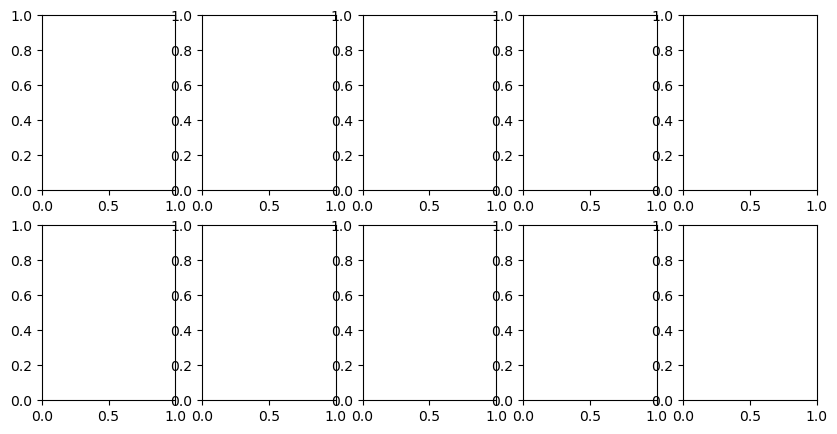

In [94]:
#try to visualize this binary_train set

#multiple images in grid - first 10 digits
fig, axes = plt.subplots(2, 5, figsize=(10,5))

for i, ax in enumerate(axes.flat):
    #pick row #1 (index i)
    row = binary_train.iloc[i]
    
    #pick label column in the chosen row
    label = row['label']

    #pick pixel columns in the chosen row (all columns except label column)
    pixels = row.drop('label').values

    #reshape to 28x28
    image = pixels.reshape(28,28)

    #plot image
    ax.imshow(image, cmap="grey")
    ax.set_title(label)
    ax.axis("off")

fig.suptitle('Binary training dataset - First 10 digits', fontsize = 16)
plt.tight_layout()
plt.savefig("binary_train_10digits_visual.png", dpi=300, bbox_inches='tight')
plt.show

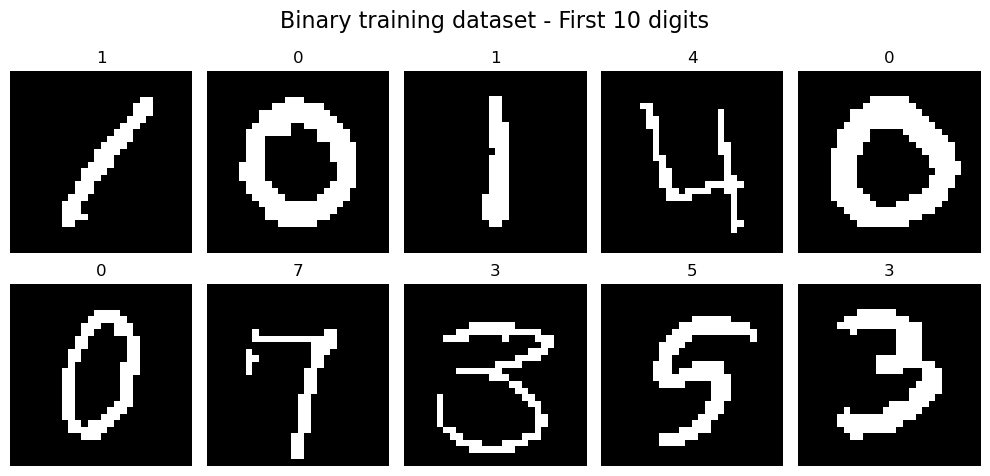

In [98]:
# forgot that i may have added mean intensity and area to these
# going to just look at the pixel columns
fig, axes = plt.subplots(2, 5, figsize=(10,5))

# Only keep actual pixel columns
pixel_columns = [c for c in binary_train.columns if c not in ['label', 'mean_intensity', 'pixel_area']]

for i, ax in enumerate(axes.flat):
    row = binary_train.iloc[i]
    label = row['label']
    pixels = row[pixel_columns].values
    image = pixels.reshape(28,28)
    
    ax.imshow(image, cmap="gray")
    ax.set_title(label)
    ax.axis("off")

fig.suptitle('Binary training dataset - First 10 digits', fontsize=16)
plt.tight_layout()
plt.savefig("binary_train_10digits_visual.png", dpi=300, bbox_inches='tight')
plt.show()

12744 0
8479 0
21391 0
20725 0
35082 0
23290 0
17984 0
18451 0
35720 0
6048 0
12385 0
15166 0
38731 0
35152 0
17369 0
2134 0
8093 0
4002 0
16540 0
12526 0


AttributeError: 'list' object has no attribute 'reshape'

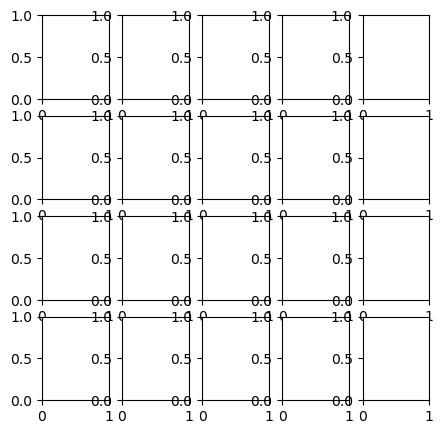

In [110]:
#pick random 20 images -- per digit label
ones = binary_train[binary_train['label'] == 1]
twos = binary_train[binary_train['label'] == 2]
threes = binary_train[binary_train['label'] == 3]
fours = binary_train[binary_train['label'] == 4]
fives = binary_train[binary_train['label'] == 5]
sixes = binary_train[binary_train['label'] == 6]
sevens = binary_train[binary_train['label'] == 7]
eights = binary_train[binary_train['label'] == 8]
nines = binary_train[binary_train['label'] == 9]
zeroes = binary_train[binary_train['label'] == 0]

sampled_rows_train = zeroes.sample(n=20, random_state=7)
#random state used: 7

#multiple images in grid - random 20 digits
fig, axes = plt.subplots(4, 5, figsize=(5,5))

for (idx, row), ax in zip(sampled_rows_train.iterrows(), axes.flat):
    print(idx, row['label'])
   
    #pick label column in the chosen row
    label = row['label']

   # Only keep actual pixel columns
pixel_columns = [c for c in binary_train.columns if c not in ['label', 'mean_intensity', 'pixel_area']]


image = pixel_columns.reshape(28,28)

    #plot image
ax.imshow(image, cmap="grey")
ax.set_title(label)
ax.axis("off")

fig.suptitle('Binary training dataset - digit = 0', fontsize = 16)
plt.tight_layout()
plt.savefig("Binary_train_visual_digit0.png", dpi=300, bbox_inches='tight')
plt.show